In [41]:
import matplotlib.pyplot as pylot
import pandas as pd
import numpy as np
import pylab as pylab
%matplotlib inline

In [42]:
df=pd.read_csv("data/FuelConsumption.csv")
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]

In [43]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


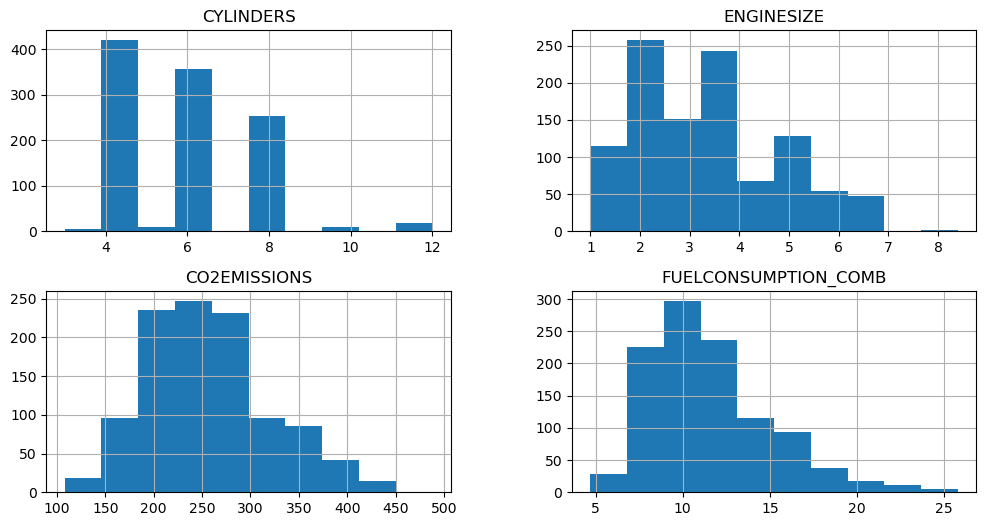

In [44]:
pylot.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
pylot.show()

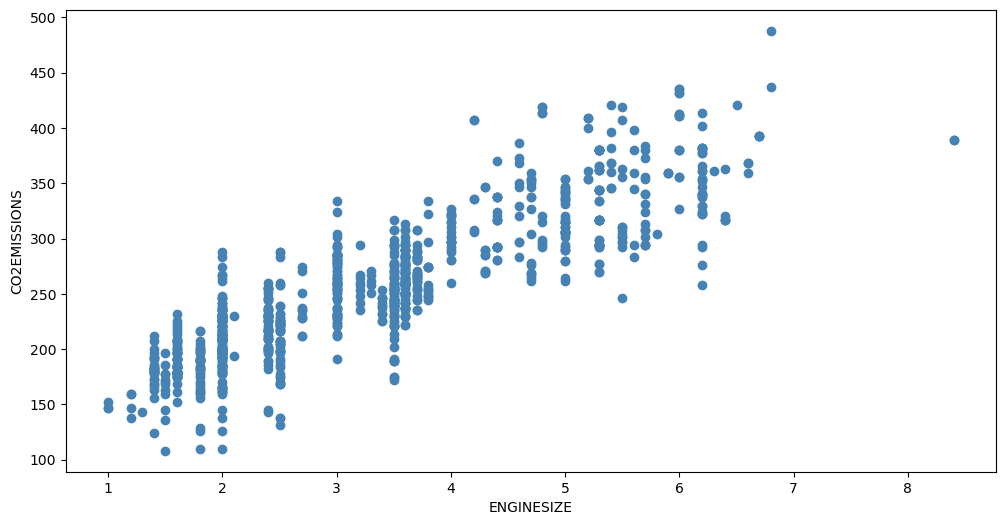

In [45]:
#verinin dağılımına bakmak
pylot.rcParams['figure.figsize'] = (12,6)
pylot.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
pylot.xlabel("ENGINESIZE")
pylot.ylabel("CO2EMISSIONS")
pylot.show()

In [46]:
# veri setini ayırma işlemi
from sklearn.model_selection import train_test_split
#test: %20, train:%80
train, test=train_test_split(df, test_size=0.2)

Dependent ve Independent değişkenleri arasındaki ilişki:
['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

CO2EMISSIONS= ß0+ ß1*CYLINDERS + (ß2*ENGINESIZE)² + (ß3*FUELCONSUMPTION_COMB)^3

For example, the original feature set has only one feature: ENGINESIZE
If we select the degree of the polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

#burada degree'i belirliyoruz ve obje oluşturuyoruz
poly=PolynomialFeatures(degree=2)


In [48]:
train_x_poly=poly.fit_transform(train_x) # poly olarak 2. dereceye dataya dönüştürüyoruz
print(train_x_poly)

[[ 1.    3.5  12.25]
 [ 1.    3.8  14.44]
 [ 1.    2.    4.  ]
 ...
 [ 1.    2.4   5.76]
 [ 1.    5.   25.  ]
 [ 1.    3.5  12.25]]


- Transformed data looks like feature sets of multiple linear regression analysis

y= ß0 + ß1*x1 + ß2*x2

- Polynomial regressionis a special case of liear regression, with selection your features.

In [49]:
clf=linear_model.LinearRegression() #linear reg objesi oluşturuldu
train_y_=clf.fit(train_x_poly, train_y)

# The coefficients  and intercept
print("Coefficients: ", clf.coef_)
print("Intercept: ", clf.intercept_)

Coefficients:  [[ 0.         47.18390932 -1.11604866]]
Intercept:  [112.17092731]


<module 'matplotlib.pyplot' from 'd:\\Program\\Miniconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

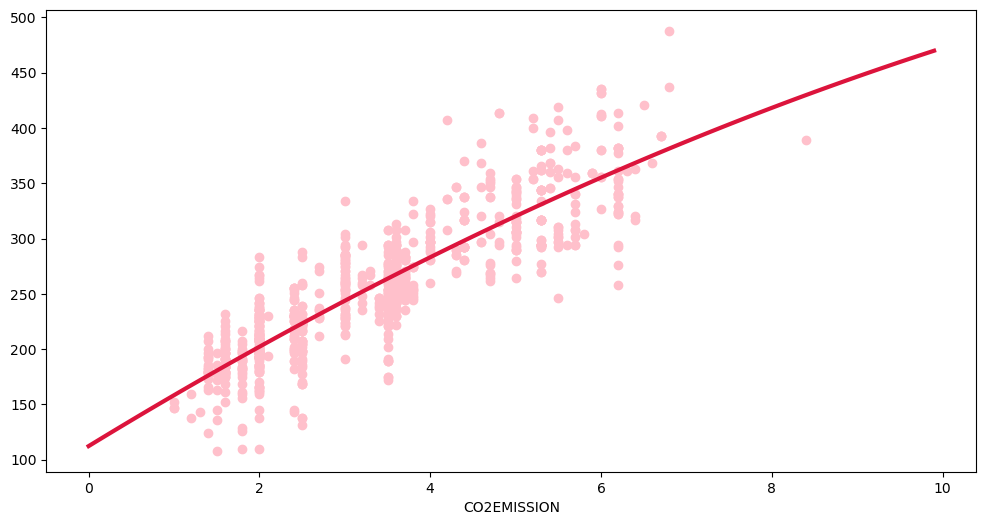

In [50]:
#Formül bulunan değerler üzerinden yazılır.
pylot.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="pink")

#ne kadar nokta verirsek o kadar y değerinin karşılığını alırız
xx=np.arange(0.0, 10.0, 0.1)

yy=clf.intercept_[0]+ clf.coef_[0][1]*xx + clf.coef_[0][2]* np.power(xx, 2)

pylot.plot(xx, yy, "crimson", lw=3)

pylot.xlabel("ENGINESIZE")
pylot.xlabel("CO2EMISSION")
pylot

# Evaluation

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelin tahmin ettiği değerler
test_x_poly=poly.transform(test_x)
predicted_y = clf.predict(test_x_poly)

# MAE, MSE, RMSE ve R2 Score hesaplama

mae = mean_absolute_error(test_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(test_y, predicted_y)
print("MSE: ", mse)

rmse=np.sqrt(mean_squared_error(test_y, predicted_y))
print("RMSE: ", rmse)

r2=r2_score(test_y, predicted_y)
print("r²: ", r2)


MAE:  23.087714180194578
MSE:  965.6575164933583
RMSE:  31.075030434311056
r²:  0.7808454859732996


# Practice
Try to use a polynomial regression with the dataset but this time with degree theree(cubic).
Does it result in better accuracy?

In [54]:
#derece'yi 3 olarak belirledik ve obje oluşturduk
poly_=PolynomialFeatures(degree=3)

In [61]:
#Eğitim veri seti için polinom derecesi 3'e dönüştürme
train_x_poly_=poly_.fit_transform(train_x)

#Dönüştürülen veri
print(train_x_poly_)

[[  1.      3.5    12.25   42.875]
 [  1.      3.8    14.44   54.872]
 [  1.      2.      4.      8.   ]
 ...
 [  1.      2.4     5.76   13.824]
 [  1.      5.     25.    125.   ]
 [  1.      3.5    12.25   42.875]]


In [69]:
#linear regresyon modelinden bir obje oluşturuldu
clf_=linear_model.LinearRegression()

# Önceden oluşturulan train_x_poly_ ve train_y'yi kullanıyoruz
# train_x_poly_, PolynomialFeatures ile dönüştürülmüş eğitim veri seti(içinde diğer 3 kolonu barındırır)
# train_y, CO2 emisyon değerlerini içeren eğitim veri seti

#Modeli eğitim veri setine fit etme
train_y__=clf_.fit(train_x_poly_, train_y)

# Katsayılar ve intercept değerini ekrana yazdır
print("Coefficients: ", clf_.coef_)
print("Intercept: ", clf_.intercept_)

TypeError: Singleton array array(LinearRegression(), dtype=object) cannot be considered a valid collection.

IndexError: index 3 is out of bounds for axis 0 with size 3

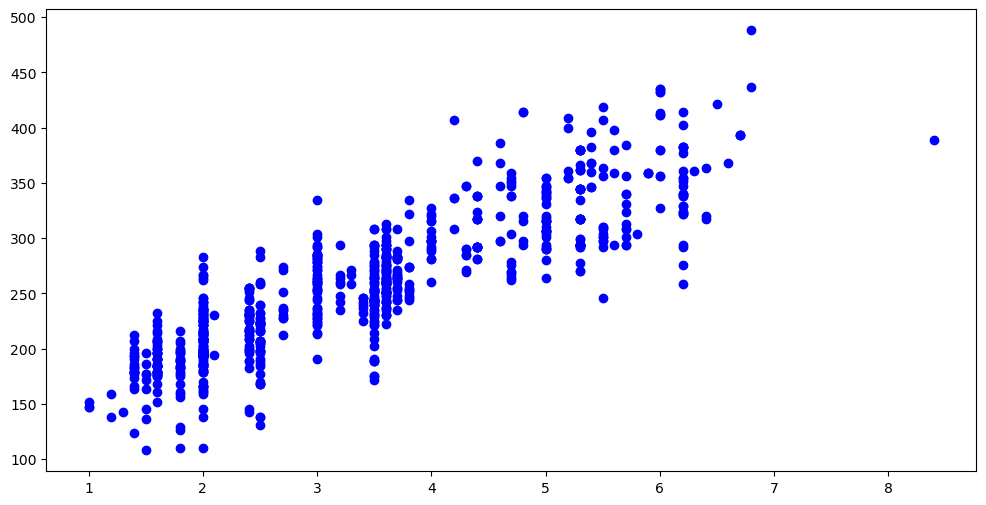

In [67]:
# Scatter plot çizimi
pylot.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")

#Eğri çiziminde x değerlerini oluşturma
x_degerler = np.arange(0.0, 10.0, 0.1)

# Polinom regresyon modelinin tahmin ettiği y değerlerini hesaplama
y_degerler = clf_.intercept_[0] + clf_.coef_[0][1] * x_degerler + clf_.coef_[0][2] * np.power(x_degerler, 2) + clf.coef_[0][3] * np.power(x_degerler, 3)

# Eğri çizimi
pylot.plot(x_degerler, y_degerler, "crimson", lw=3) #crimsion: çizgi rengi koyu kırmızı
pylot.xlabel("ENGINESIZE")
pylot.ylabel("CO2EMISSION")
pylot.show()


In [ ]:

# Modelin tahmin ettiği değerler
predicted_y_ = clf_.predict(train_x_poly)

# MAE hesapla
mae = mean_absolute_error(train_y, predicted_y_)
print("MAE: ", mae)

mse = mean_squared_error(train_y, predicted_y_)
print("MAE: ", mae)

rmse=np.sqrt(mean_squared_error(train_y, predicted_y_))
print("RMSE: ", rmse)

r2=r2_score(train_y, predicted_y_)
print("r²: ", r2)